In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader,TensorDataset

In [43]:
df = pd.read_csv("datatsets/fifa_players.csv")

In [44]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [46]:
df.dtypes.sort_values(ascending=False)

name                              object
nationality                       object
full_name                         object
national_team_position            object
national_team                     object
preferred_foot                    object
body_type                         object
positions                         object
birth_date                        object
value_euro                       float64
wage_euro                        float64
weight_kgs                       float64
release_clause_euro              float64
height_cm                        float64
national_rating                  float64
national_jersey_number           float64
long_shots                         int64
reactions                          int64
balance                            int64
shot_power                         int64
jumping                            int64
stamina                            int64
strength                           int64
standing_tackle                    int64
aggression      

In [47]:
positions_to_keep = ['LW', 'RW', 'CF', 'ST']
pattern = '|'.join(positions_to_keep)

df = df[df['positions'].str.contains(pattern)]

In [48]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,"RW,ST,RM",France,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,6/2/1988,30,172.72,69.9,ST,Argentina,89,89,...,83,65,24,92,83,83,90,30,20,12
9,E. Cavani,Edinson Roberto Cavani Gómez,2/14/1987,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39


In [49]:
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,"RW,ST,RM",France,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,6/2/1988,30,172.72,69.9,ST,Argentina,89,89,...,83,65,24,92,83,83,90,30,20,12
9,E. Cavani,Edinson Roberto Cavani Gómez,2/14/1987,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17943,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,82,56,36,89,88,81,94,27,24,33
17944,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2/5/1985,34,187.96,83.0,"ST,LW",Portugal,94,94,...,93,63,29,95,82,85,95,28,31,23
17945,J. Serra,Janni-Luca Serra,3/13/1998,20,193.04,87.1,ST,Germany,67,79,...,59,65,23,69,45,50,49,35,38,33
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


In [50]:
columns_to_remove = [
    'height_cm', 'weight_kgs', 'preferred_foot', 'long_passing', 'full_name','birth_date','positions','nationality','body_type',
    'release_clause_euro', 'national_team','national_rating','national_team_position','national_jersey_number','reactions', 'jumping',
    'stamina', 'strength', 'aggression', 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle','overall_rating','potential','weak_foot(1-5)'
]

df = df.drop(columns=columns_to_remove)

In [51]:
df.head()

,name,age,value_euro,wage_euro,international_reputation(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,short_passing,...,acceleration,sprint_speed,agility,balance,shot_power,long_shots,positioning,vision,penalties,composure
0,L. Messi,31,110500000.0,565000.0,5,4,86,95,70,92,...,91,86,93,95,85,94,94,94,75,96
3,L. Insigne,27,62000000.0,165000.0,3,4,86,77,56,85,...,94,86,94,93,75,84,83,87,61,83
6,K. Mbappé,20,81000000.0,100000.0,3,5,77,88,77,82,...,96,96,92,83,79,78,88,82,70,86
7,S. Agüero,30,64500000.0,300000.0,4,4,70,93,77,81,...,88,80,86,91,88,83,92,83,83,90
9,E. Cavani,32,60000000.0,200000.0,4,3,70,89,89,78,...,75,76,77,59,87,79,93,77,85,82


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4900 entries, 0 to 17953
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           4900 non-null   object 
 1   age                            4900 non-null   int64  
 2   value_euro                     4838 non-null   float64
 3   wage_euro                      4839 non-null   float64
 4   international_reputation(1-5)  4900 non-null   int64  
 5   skill_moves(1-5)               4900 non-null   int64  
 6   crossing                       4900 non-null   int64  
 7   finishing                      4900 non-null   int64  
 8   heading_accuracy               4900 non-null   int64  
 9   short_passing                  4900 non-null   int64  
 10  volleys                        4900 non-null   int64  
 11  dribbling                      4900 non-null   int64  
 12  curve                          4900 non-null   int64

In [53]:
df.isnull().sum()

name                              0
age                               0
value_euro                       62
wage_euro                        61
international_reputation(1-5)     0
skill_moves(1-5)                  0
crossing                          0
finishing                         0
heading_accuracy                  0
short_passing                     0
volleys                           0
dribbling                         0
curve                             0
freekick_accuracy                 0
ball_control                      0
acceleration                      0
sprint_speed                      0
agility                           0
balance                           0
shot_power                        0
long_shots                        0
positioning                       0
vision                            0
penalties                         0
composure                         0
dtype: int64

In [54]:
df[df.isna()['value_euro']]

,name,age,value_euro,wage_euro,international_reputation(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,short_passing,...,acceleration,sprint_speed,agility,balance,shot_power,long_shots,positioning,vision,penalties,composure
510,P. Tau,24,NaN,NaN,1,4,75,85,52,75,...,79,76,72,88,68,72,82,77,68,79
576,B. Jokič,32,NaN,NaN,1,2,76,48,65,74,...,79,79,71,76,68,61,60,55,49,75
667,K. Konaté,27,NaN,NaN,1,3,70,67,64,71,...,88,87,85,76,80,72,74,63,67,67
968,S. Nakamura,40,NaN,4000.0,3,3,80,63,28,78,...,32,30,75,69,79,77,68,74,83,77
1165,J. Sambenito,27,NaN,NaN,1,2,40,74,72,57,...,79,72,61,64,73,67,75,60,67,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16326,Kahraba,24,NaN,NaN,1,3,66,73,64,69,...,78,84,79,66,73,70,77,66,69,63
16573,K. Fofana,27,NaN,NaN,1,3,66,75,72,74,...,59,77,63,60,78,73,72,69,74,83
17072,I. Popov,31,NaN,NaN,2,4,71,74,66,76,...,80,73,75,60,79,72,76,75,71,72
17235,G. Sio,29,NaN,NaN,2,3,68,77,71,73,...,78,85,79,73,77,74,76,73,72,72


In [55]:
df = df.dropna(subset=['value_euro', 'wage_euro'], how='any')

df.isnull().sum()

name                             0
age                              0
value_euro                       0
wage_euro                        0
international_reputation(1-5)    0
skill_moves(1-5)                 0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
balance                          0
shot_power                       0
long_shots                       0
positioning                      0
vision                           0
penalties                        0
composure                        0
dtype: int64

In [56]:
df.dtypes.sort_values(ascending=False)

name                              object
value_euro                       float64
wage_euro                        float64
ball_control                       int64
penalties                          int64
vision                             int64
positioning                        int64
long_shots                         int64
shot_power                         int64
balance                            int64
agility                            int64
sprint_speed                       int64
acceleration                       int64
curve                              int64
freekick_accuracy                  int64
age                                int64
dribbling                          int64
volleys                            int64
short_passing                      int64
heading_accuracy                   int64
finishing                          int64
crossing                           int64
skill_moves(1-5)                   int64
international_reputation(1-5)      int64
composure       

In [57]:
df.columns

Index(['name', 'age', 'value_euro', 'wage_euro',
       'international_reputation(1-5)', 'skill_moves(1-5)', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'ball_control',
       'acceleration', 'sprint_speed', 'agility', 'balance', 'shot_power',
       'long_shots', 'positioning', 'vision', 'penalties', 'composure'],
      dtype='object')

In [58]:
import matplotlib.ticker as mtick

<Axes: xlabel='age', ylabel='Count'>

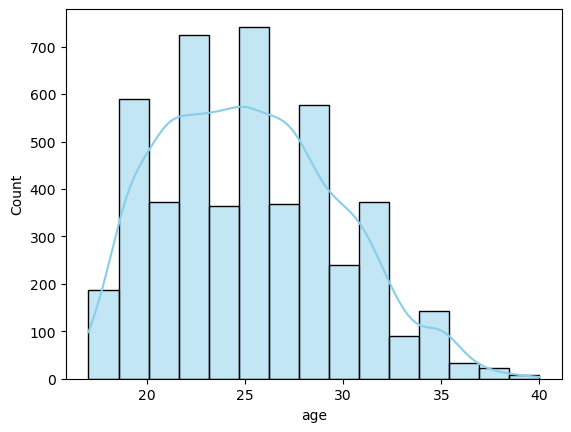

In [59]:
sns.histplot(df['age'], kde=True, color='skyblue',bins=15)

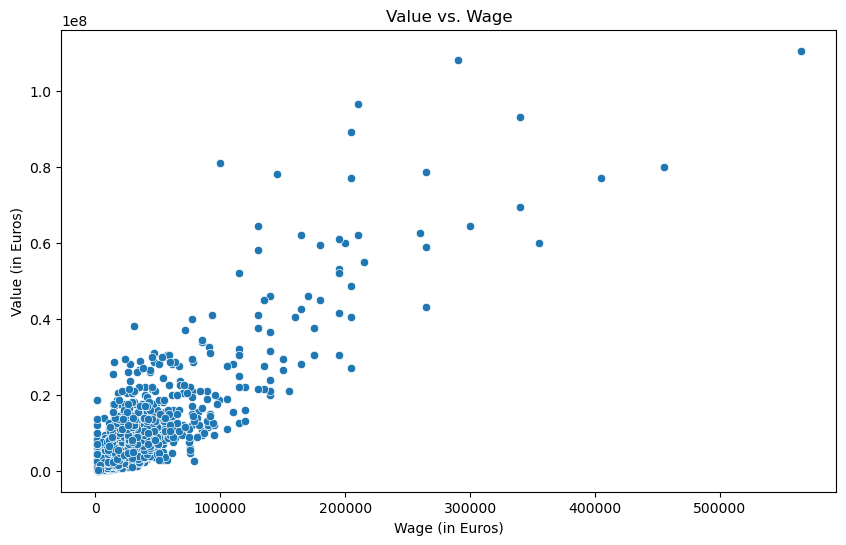

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wage_euro', y='value_euro')
plt.title('Value vs. Wage')
plt.xlabel('Wage (in Euros)')
plt.ylabel('Value (in Euros)')
plt.show()


In [61]:
df.corr(numeric_only=True)['value_euro'].sort_values()

age                              0.112423
balance                          0.167804
heading_accuracy                 0.215682
sprint_speed                     0.219858
acceleration                     0.227239
agility                          0.261715
penalties                        0.327811
crossing                         0.364045
freekick_accuracy                0.373190
finishing                        0.409653
shot_power                       0.424921
volleys                          0.434139
curve                            0.435801
skill_moves(1-5)                 0.448397
long_shots                       0.452091
vision                           0.496578
short_passing                    0.507852
positioning                      0.525439
composure                        0.528541
dribbling                        0.540066
ball_control                     0.582093
international_reputation(1-5)    0.677954
wage_euro                        0.877762
value_euro                       1

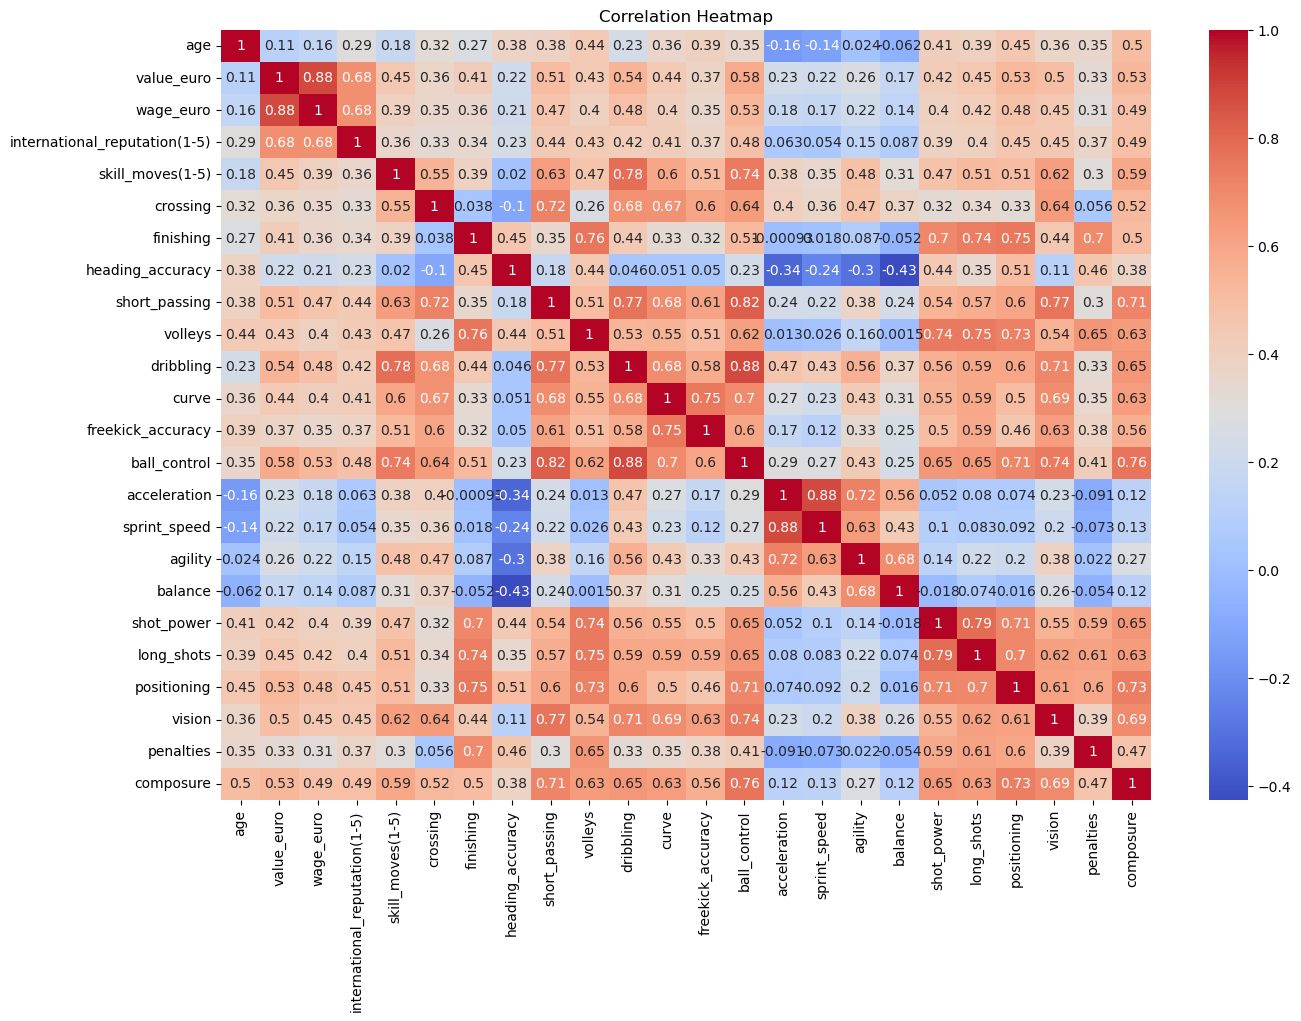

In [62]:
plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

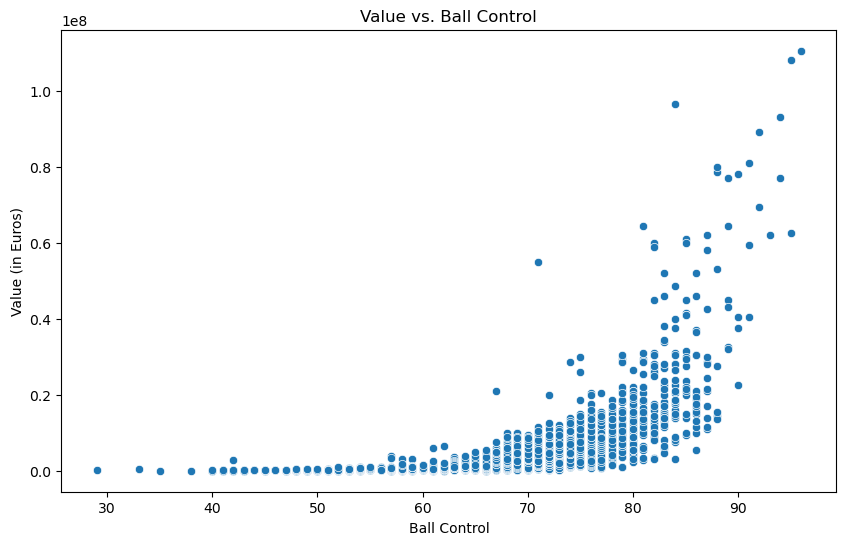

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ball_control', y='value_euro')
plt.title('Value vs. Ball Control')
plt.xlabel('Ball Control')
plt.ylabel('Value (in Euros)')
plt.show()

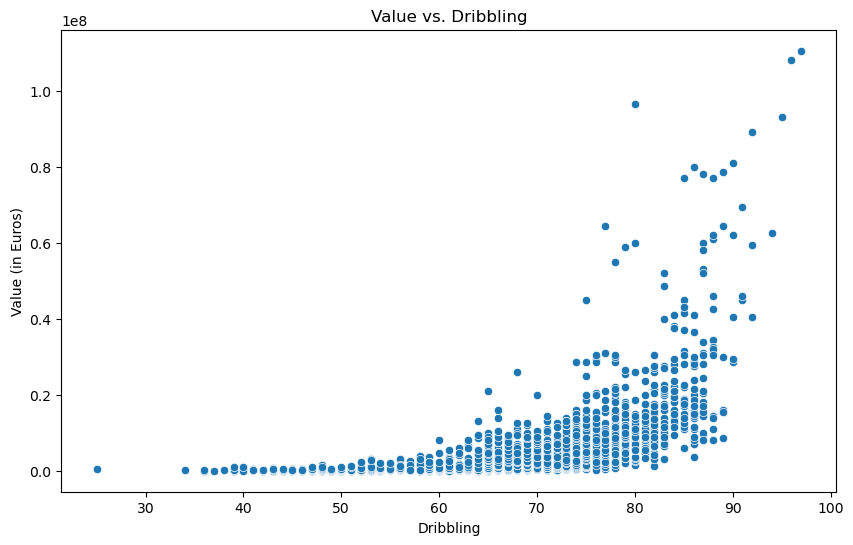

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dribbling', y='value_euro')
plt.title('Value vs. Dribbling')
plt.xlabel('Dribbling')
plt.ylabel('Value (in Euros)')
plt.show()

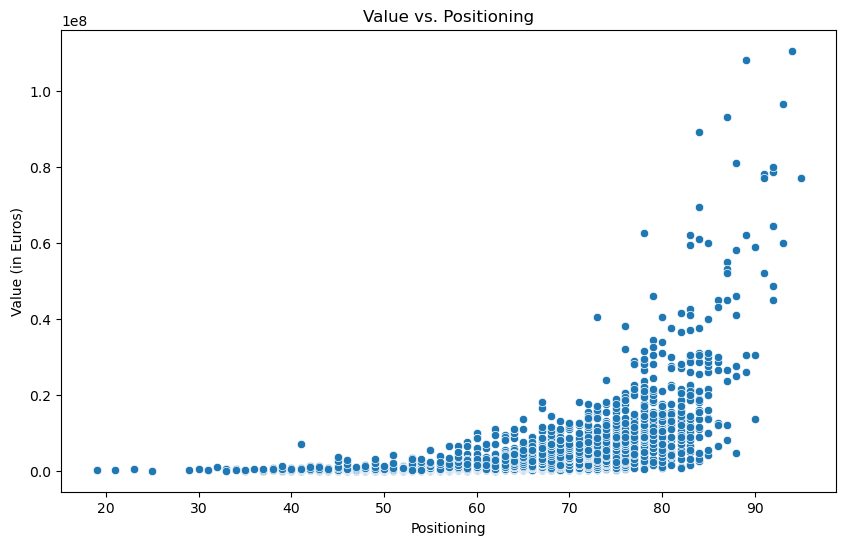

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='positioning', y='value_euro')
plt.title('Value vs. Positioning')
plt.xlabel('Positioning')
plt.ylabel('Value (in Euros)')
plt.show()

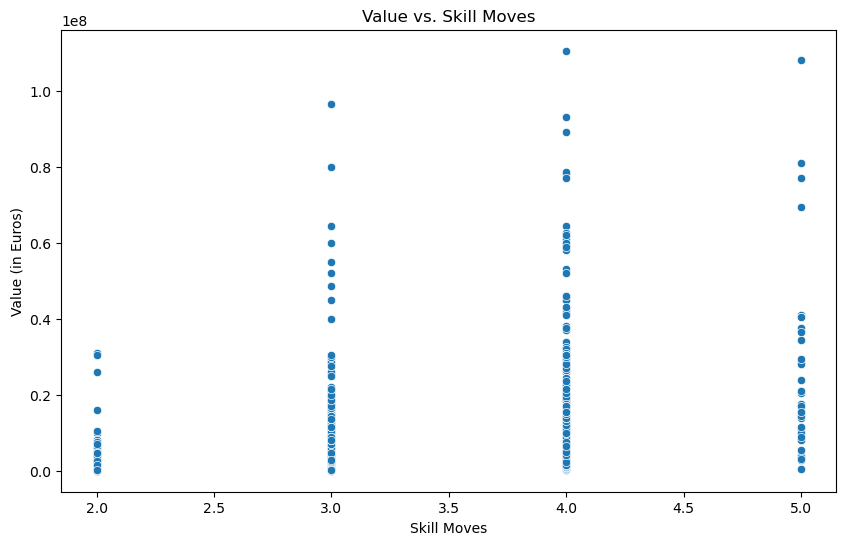

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='skill_moves(1-5)', y='value_euro')
plt.title('Value vs. Skill Moves')
plt.xlabel('Skill Moves')
plt.ylabel('Value (in Euros)')
plt.show()

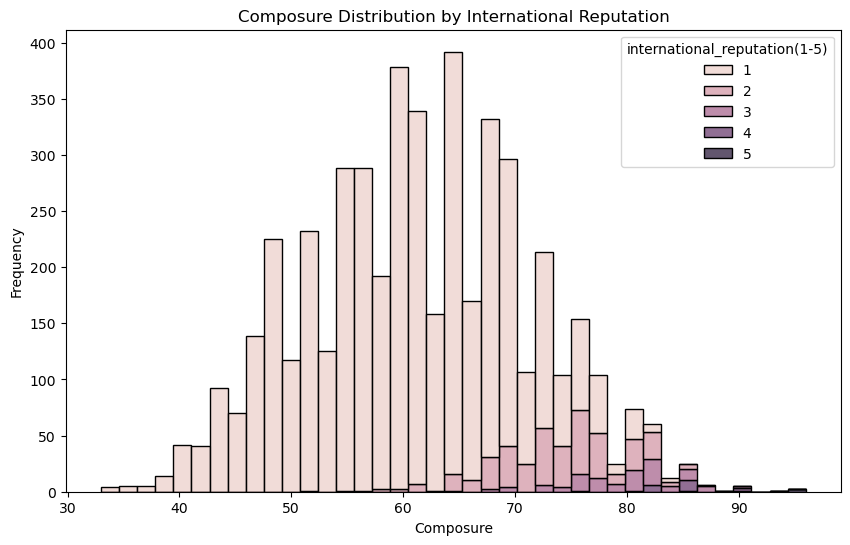

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='composure', hue='international_reputation(1-5)', multiple="stack")
plt.title('Composure Distribution by International Reputation')
plt.xlabel('Composure')
plt.ylabel('Frequency')
plt.show()

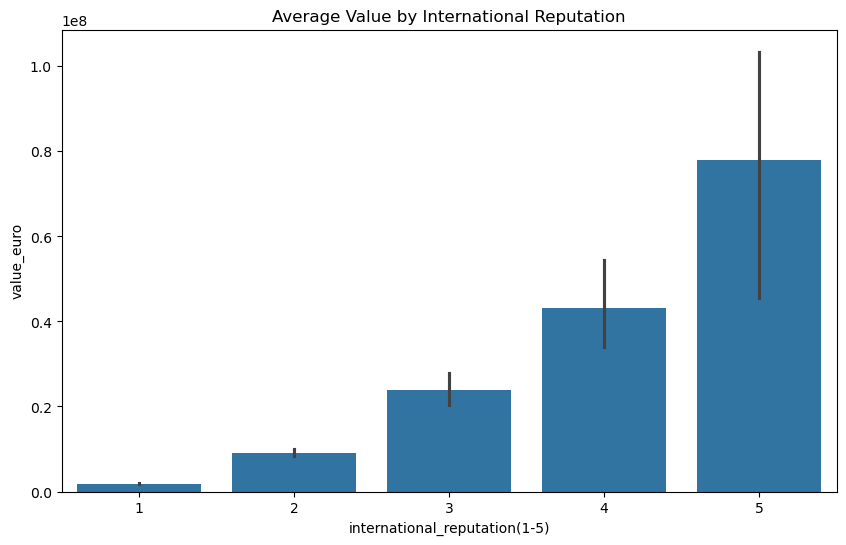

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='international_reputation(1-5)', y='value_euro')
plt.title('Average Value by International Reputation')
plt.show()

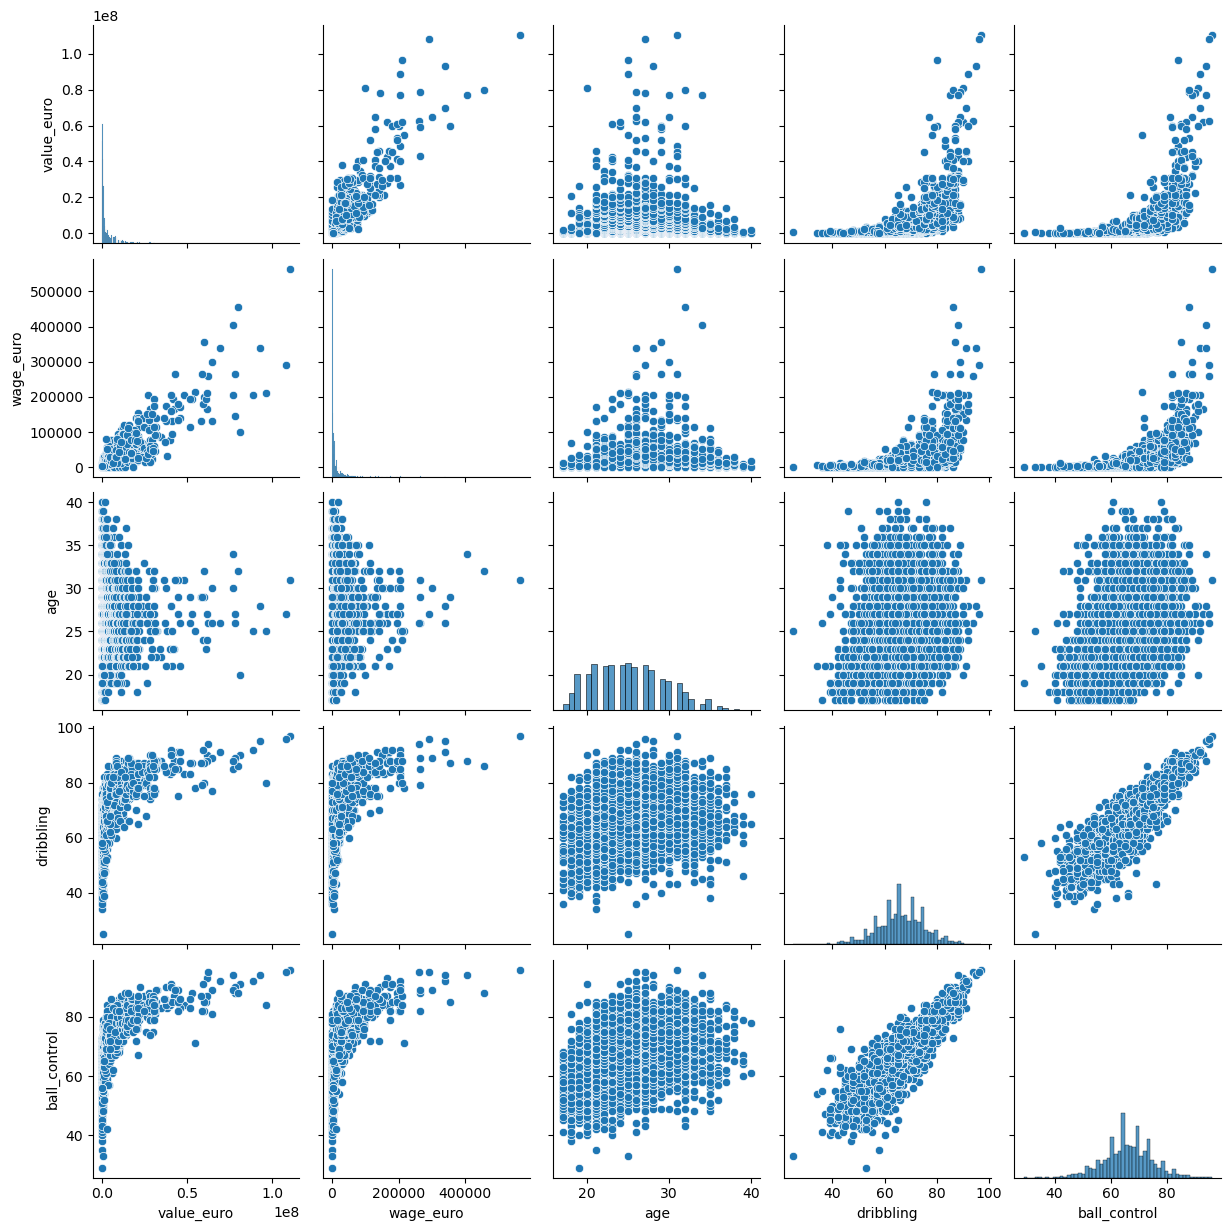

In [69]:
sns.pairplot(df, vars=['value_euro', 'wage_euro', 'age', 'dribbling', 'ball_control'])
plt.show()

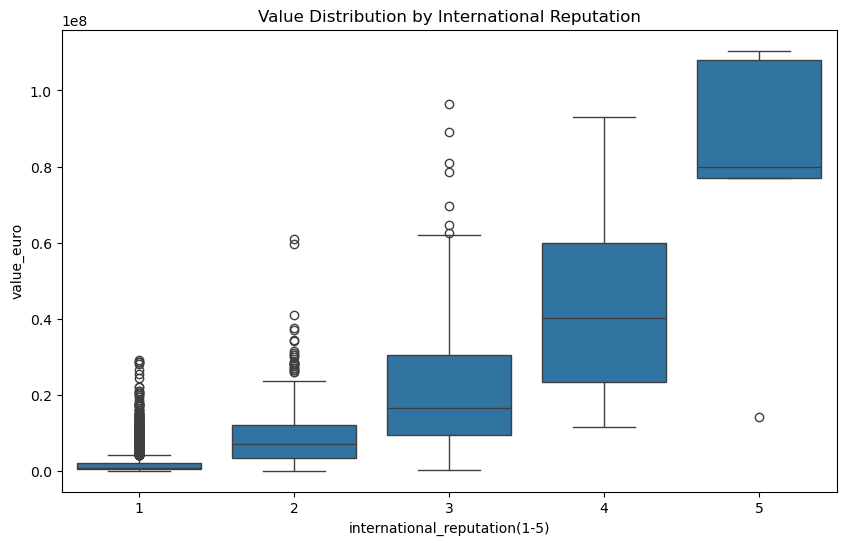

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='international_reputation(1-5)', y='value_euro')
plt.title('Value Distribution by International Reputation')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
X = df.drop(['value_euro','name'],axis=1)
y = df['value_euro']

In [73]:
scaler = StandardScaler()

In [74]:
scaled_X = scaler.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=101)



In [76]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

In [77]:
class FootballValueFFN(nn.Module):

    def __init__(self,input_size):
        super(FootballValueFFN,self).__init__()
        self.fc1 = nn.Linear(input_size,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.output = nn.Linear(32,1)

    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.output(x)

        return x

In [78]:
input_size = X_train.shape[1]
learning_rate = 0.001
epochs = 100
batch_size = 32

In [79]:
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

In [80]:
model = FootballValueFFN(input_size)
lossfun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [81]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [83]:
train_losses = []

In [85]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(X)
        loss = lossfun(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}")

Epoch [1/100], Train Loss: 5561305443979.6367
Epoch [2/100], Train Loss: 5526073368102.0830
Epoch [3/100], Train Loss: 5502223063124.6279
Epoch [4/100], Train Loss: 5482506777151.4707
Epoch [5/100], Train Loss: 5470468464978.5127
Epoch [6/100], Train Loss: 5450072371369.2559
Epoch [7/100], Train Loss: 5424296743419.7686
Epoch [8/100], Train Loss: 5410924772969.7852
Epoch [9/100], Train Loss: 5412122439307.6367
Epoch [10/100], Train Loss: 5374067734951.1406
Epoch [11/100], Train Loss: 5349436763787.6367
Epoch [12/100], Train Loss: 5331598597399.2725
Epoch [13/100], Train Loss: 5319179478955.3721
Epoch [14/100], Train Loss: 5294874116231.4053
Epoch [15/100], Train Loss: 5301371393997.2227
Epoch [16/100], Train Loss: 5271661625344.0000
Epoch [17/100], Train Loss: 5258929256735.7354
Epoch [18/100], Train Loss: 5241770287984.1318
Epoch [19/100], Train Loss: 5221806714507.6367
Epoch [20/100], Train Loss: 5217061754016.7930
Epoch [21/100], Train Loss: 5195009637587.5703
Epoch [22/100], Train 

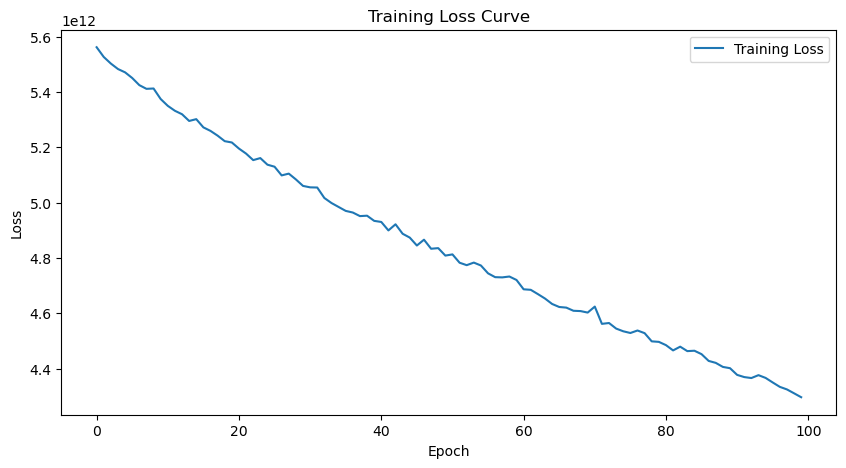

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

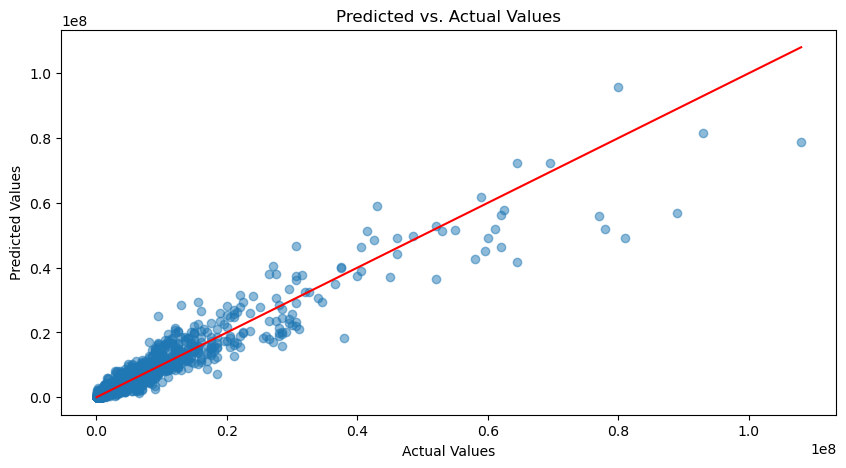

In [87]:
model.eval()
preds = []
actuals = []

with torch.no_grad():
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        output = model(X)
        preds.extend(output.cpu().numpy())
        actuals.extend(y.cpu().numpy())

plt.figure(figsize=(10, 5))
plt.scatter(actuals, preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red')
plt.show()